# 📚 Importing Libraries

In [1]:
#imported all of the relevant libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 📁 Dataset


In [2]:
wine=pd.read_csv("wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# See the number of rows and columns
print("Rows, columns: " + str(wine.shape))

Rows, columns: (999, 12)


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,8.731231,0.528128,0.294875,2.580330,0.090410,15.179179,48.364364,0.997355,3.298929,0.668659,10.238038,5.593594
std,1.836041,0.178566,0.200035,1.239231,0.049929,9.974588,33.306606,0.001770,0.157934,0.183249,1.030241,0.798921
min,4.600000,0.120000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990640,2.740000,0.330000,8.400000,3.000000
25%,7.400000,0.400000,0.120000,2.000000,0.072000,7.000000,23.000000,0.996390,3.190000,0.560000,9.500000,5.000000
50%,8.300000,0.520000,0.280000,2.300000,0.081000,13.000000,39.000000,0.997300,3.300000,0.620000,9.900000,5.000000
75%,9.800000,0.632500,0.470000,2.700000,0.093000,20.500000,64.500000,0.998400,3.400000,0.740000,10.800000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,165.000000,1.003200,3.900000,2.000000,14.900000,8.000000


In [5]:
#check missing values
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
#check duplicate values
wine.duplicated().sum()

149

In [7]:
wine.drop_duplicates(inplace=True)
wine.shape

(850, 12)

# Data Visualization 📊📈📉

# 🌡️Heatmap 

<AxesSubplot:>

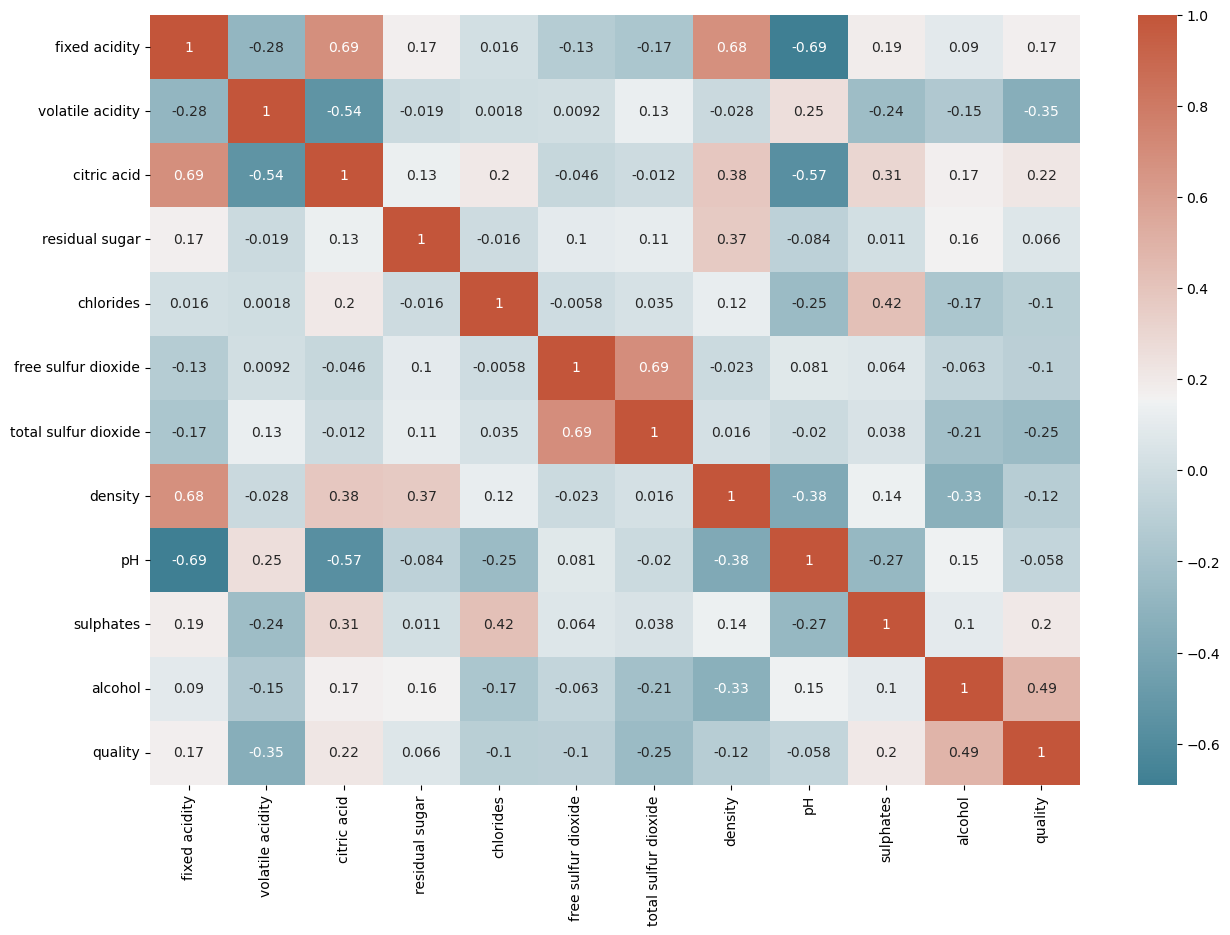

In [8]:
corr = wine.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# 📊 HistPlot

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

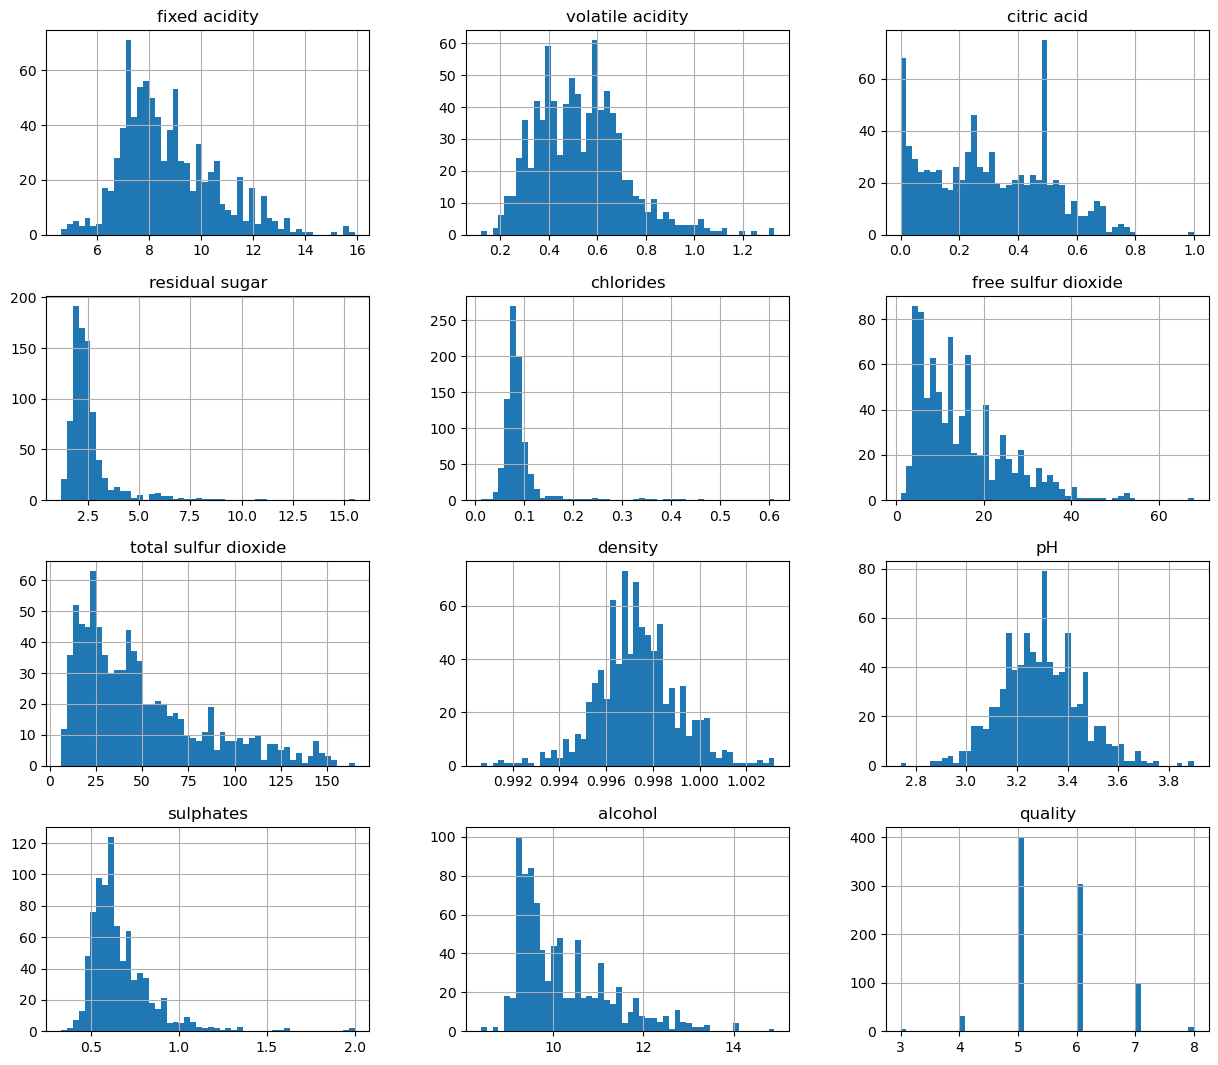

In [9]:
wine.hist(figsize=(15,13),bins=50)

# 📊 Pair Plot

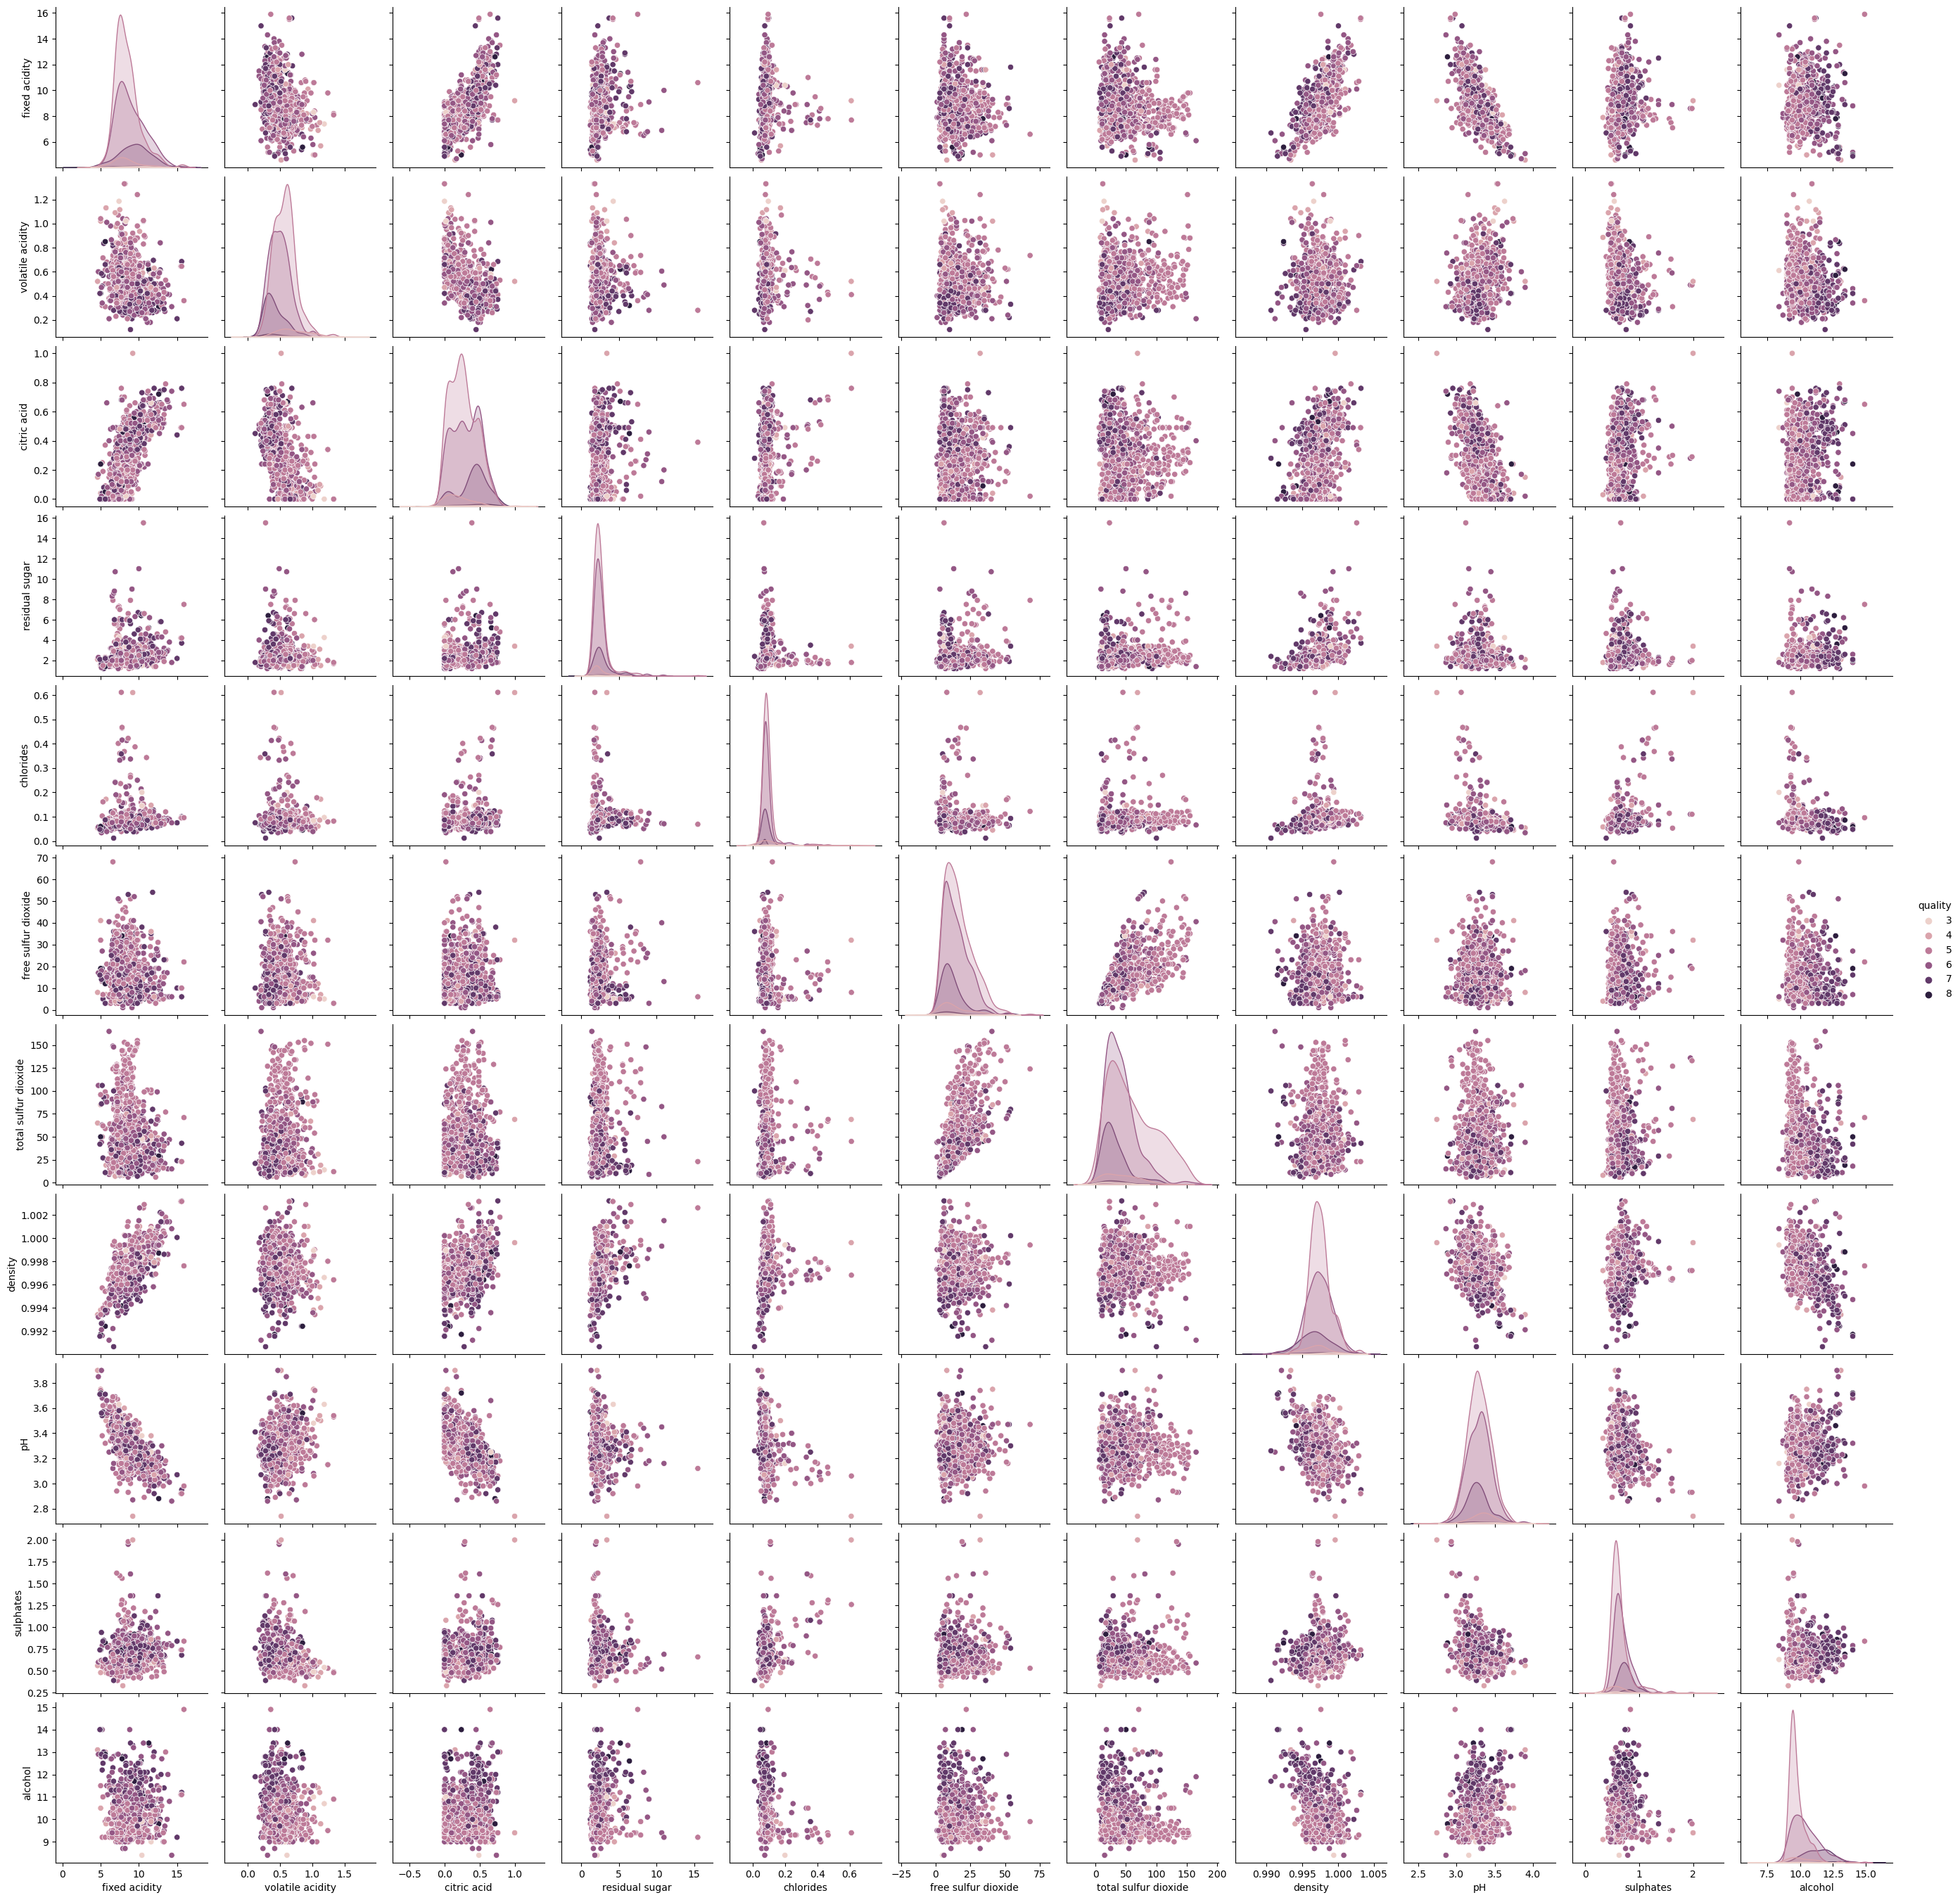

In [10]:
sns.pairplot(wine, hue='quality')

# 🛠️ Feature Engineering

In [11]:
#Prepare the data which will define the predictor and response variable:
x=wine.drop("quality",axis=1) #input
y=wine["quality"]  #output

In [12]:
#split data into the train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=200)
# the test set will be 20% of the whole data set

# 📈Model Training: Linear Regression

In [13]:
#fit the model on the training set.
model=LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [14]:
# Predict from the test dataset
predictions = model.predict(x_test)

# 🧪Model Evaluation

In [15]:
#Once we fit the model, then we have to print all coefficients.
print (model.intercept_)
print (model.coef_)

38.127410821362574
[ 5.12052680e-02 -1.18085315e+00 -3.57794021e-01  2.06328088e-02
 -1.23311306e+00  1.12205265e-03 -3.41548106e-03 -3.53723318e+01
 -4.98336486e-02  6.71007003e-01  2.86317880e-01]


In [16]:
mae = mean_absolute_error(y_test,model.predict(x_test))
mse = mean_squared_error(y_test,model.predict(x_test))
rmse = np.sqrt(mean_squared_error(y_test,model.predict(x_test)))
r_squared = r2_score(y_test,model.predict(x_test))
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MSE: 0.48704888745361846
RMSE: 0.6978888790155768
R2 Score: 0.3134133531335265


# 🎯Model Predictions

In [17]:
predictions

array([5.10673598, 5.74843911, 5.12651133, 5.66751269, 5.3973216 ,
       5.24635311, 5.76291584, 5.13895236, 5.9066367 , 4.73334963,
       4.69170225, 5.16746336, 5.36484248, 6.14471214, 5.70815106,
       6.1374908 , 5.45664671, 5.28676293, 5.50311031, 6.11318686,
       5.0908298 , 5.19354342, 6.14516268, 5.18928563, 6.82111025,
       5.41417767, 5.48255816, 5.39011774, 5.13634116, 5.33627988,
       4.87399828, 5.99015535, 5.26020987, 5.69935737, 5.68881434,
       5.17491038, 4.82490375, 5.52098159, 5.63217074, 5.27626334,
       6.01635982, 5.08179371, 5.36386549, 5.59218141, 5.65748006,
       5.30908494, 4.54203157, 5.44589721, 5.27489263, 5.7588343 ,
       5.5855134 , 5.75313592, 6.09303276, 4.79764935, 5.99723039,
       5.8788045 , 6.98803121, 4.81165547, 5.49074074, 5.79436007,
       6.29823519, 5.45358592, 5.63541052, 5.87381355, 6.30808789,
       5.08147655, 6.03529309, 4.99149938, 5.20934864, 5.22470364,
       5.02983047, 5.8181291 , 4.54666237, 5.01625398, 7.49629

In [18]:
#Converting in Binary Predection
prediction = ( predictions> 0).astype(int)
prediction 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])